# AutoEncoder
Work in progress...

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

/tmp/ipykernel_3600771/3270673349.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


In [2]:
import tsod

<Axes: >

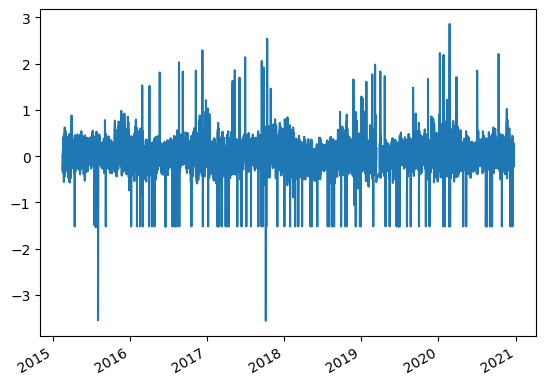

In [3]:
file_path = os.path.join("..", "tests", "data", "Ballen_20150218-20201222.csv")
df = pd.read_csv(file_path, index_col=0, parse_dates=True)
data = df.water_level
data.plot()

In [4]:
range_anomalies = tsod.RangeDetector(-1, 1.3).detect(data)
data_clean = data.copy()
data_clean[range_anomalies.values] = np.nan

In [ ]:
from importlib import reload
from pathlib import Path
import sys
local_tsod_path = Path("/home/erlingamundsen/2025-projects/tsod/tsod").resolve()
if str(local_tsod_path.parent) not in sys.path:
    sys.path.insert(0, str(local_tsod_path.parent))

from tsod.autoencoder_lstm import AutoEncoderLSTM # Came with alot of dependencies
from tsod.features import lag_time_series
reload(tsod.features)
reload(tsod.autoencoder_lstm)

normal_data = data_clean["2015"].interpolate()  # fill gaps in chosen "normal" data period
max_lag = 100  # window_size

detector = AutoEncoderLSTM() # hidden_neurons=[max_lag, 3, 3, max_lag] # Epochs is deprecated?
detector.fit(normal_data)


anomalies = detector.detect(data) == 1

Epoch 1/100


/home/erlingamundsen/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 217/1270 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.1133

KeyboardInterrupt: 

In [76]:

anomalies = detector.detect(data) == 1
anomalies = np.array([anom[0] for anom in anomalies]) # Tried to convert to numpy array to see if it would help
print(anomalies)


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step
[False False False ... False False False]


(234,)


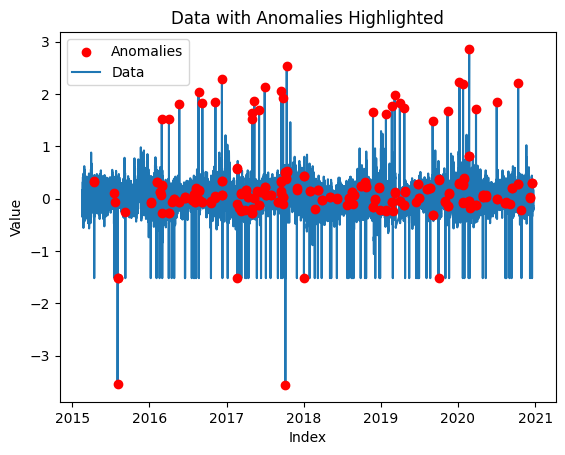

In [77]:
anomalous_points = data.iloc[:len(data)-3][anomalies] 
# we dont catch all outliers

print(anomalous_points.shape) # about 10% gets tagged as outliers (not sure if this is good or bad) but certainly not correct

plt.scatter(anomalous_points.index, anomalous_points, color="red", label="Anomalies", zorder = 3)
plt.plot(data, label="Data")


plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.title("Data with Anomalies Highlighted")
plt.show()